In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [227]:
df = pd.read_csv('netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [231]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')

In [233]:
df['director'].isnull().sum()

2634

In [235]:
df['director'] = df['director'].fillna('Unknown')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [237]:
df['cast'].isnull().sum()

825

In [239]:
df['cast'] = df['cast'].fillna('Unknown')

In [241]:
df['country'].isnull().sum()

831

In [243]:
df['country'] = df['country'].fillna('Unknown')

In [245]:
df['date_added'].isnull().sum()

10

In [247]:
df[df['date_added'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unknown,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Unknown,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,Unknown,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,Unknown,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Unknown,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,Unknown,Igor Dmitriev,Unknown,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,Unknown,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,Unknown,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,Unknown,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Unknown,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [249]:
df.loc[6066, 'date_added'] = '2014-09-15'
# df.loc[6174, 'date_added'] = 'Unknown'
df.loc[6795, 'date_added'] = '2016-04-06'
df.loc[6806, 'date_added'] = '2015-01-01'
df.loc[6901, 'date_added'] = '2016-01-04'
df.loc[7196, 'date_added'] = '2017-07-06'
df.loc[7254, 'date_added'] = '2015-06-01'
df.loc[7847, 'date_added'] = '2014-09-15'
# df.loc[7406, 'date_added'] = 'Unknown'
df.loc[8182, 'date_added'] = '2014-09-15'

In [251]:
df['release_year'].isnull().sum()

0

In [253]:
df['release_year'].value_counts()

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64

In [255]:
df['rating'].isnull().sum()

4

In [257]:
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [259]:
def ratings_updated(rows):
    if rows in ['TV-MA', 'R', 'NC-17', 'TA-MA', 'MA'] :
        return 'Adults'
    if rows in ['PG-13', 'TV-PG', 'TV-G', 'TV-14', 'TV-13', 'TA-PG', 'TA-14']:
        return 'Teens'
    if rows in ['TV-Y', 'TV-Y7', 'TV-Y7-FV', 'G', 'PG', 'PG-7']:
        return 'Kids'
    else: return 'Unrated'

In [261]:
df['rating'] = df['rating'].apply(ratings_updated)

In [263]:
df['duration'].isnull().sum()

3

In [265]:
df['duration'].value_counts()

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: count, Length: 220, dtype: int64

In [267]:
df[df['duration'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,Unrated,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,Unrated,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,Unrated,NaN,Movies,The comic puts his trademark hilarious/thought...


In [269]:
df.loc[5541, 'duration'] = '74 min'
df.loc[5794, 'duration'] = '84 min'
df.loc[5813, 'duration'] = '66 min'

In [271]:
def total_season(rows):
    if 'Season' in rows:
        return rows
    else: return 'Unknown'

df['total_seasons'] = df['duration'].apply(total_season)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,total_seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",Unknown
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2 Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1 Season
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,Adults,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1 Season
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,Adults,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",Unknown
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,Kids,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2 Seasons
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,Adults,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Unknown
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,Kids,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Unknown


In [273]:
if 'Season' in df['duration']:
    df['duration'] = 'Unknown'
else:
    df['duration'] = df['duration'].str.extract(r'(\d+)\s*min')

In [275]:
df['duration'].isnull().sum()
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,total_seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,Teens,90,Documentaries,"As her father nears the end of his life, filmm...",Unknown
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,NaN,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2 Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,Adults,NaN,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1 Season
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,Adults,NaN,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1 Season
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,Adults,NaN,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2 Seasons


In [277]:
df['listed_in'].isnull().sum()

0

In [279]:
df['description'].isnull().sum()

0

In [281]:
df = df.drop_duplicates()

In [283]:
df['director'].value_counts()

director
Unknown                           2634
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: count, Length: 4529, dtype: int64

In [285]:
df['listed_in_split'] = df['listed_in'].str.split(', ')
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genre_df = pd.DataFrame(mlb.fit_transform(df['listed_in_split']),
                       columns = mlb.classes_,
                       index = df.show_id)
genre_df

,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
show_id,,,,,,,,,,,,,,,,,,,,,
s1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
s2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
s3,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
s4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
s5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s8803,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
s8804,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
s8805,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [287]:
df['cast_count'] = df['cast'].apply(lambda x: len(str(x).split(', ')) if x != 'Unknown' else 0)
df = df.drop('listed_in_split', axis = 1)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,total_seasons,cast_count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,Teens,90,Documentaries,"As her father nears the end of his life, filmm...",Unknown,0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,NaN,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2 Seasons,19
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,Adults,NaN,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1 Season,9
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,Adults,NaN,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1 Season,0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,Adults,NaN,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2 Seasons,8


In [289]:
df.to_csv('netflix_dataset.csv')

## Exploratory Data Analysis
### Visualize distribution of movies vs. TV shows

In [292]:
movie_distribution = df['type'].value_counts().reset_index()
movie_distribution.columns = ['type', 'count']
movie_distribution.to_csv('tv_vs_movies.csv', index=False)

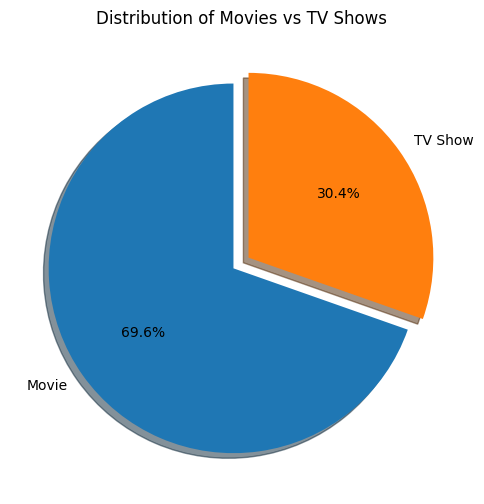

In [294]:
labels = movie_distribution['type'].tolist()
data = movie_distribution['count'].tolist()
plt.figure(figsize=(6,6))
plt.pie(data, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90, explode=[0.05]*len(data))
plt.title('Distribution of Movies vs TV Shows')
plt.show()

### Analyze trends in content addition over time.


In [297]:
year = df.release_year.value_counts().reset_index()
year.columns = ['release_year', 'count']
year = year[year['release_year'] >= 2000].sort_values('release_year')
year.to_csv('Content_added_with_Release_year.csv', index=False)

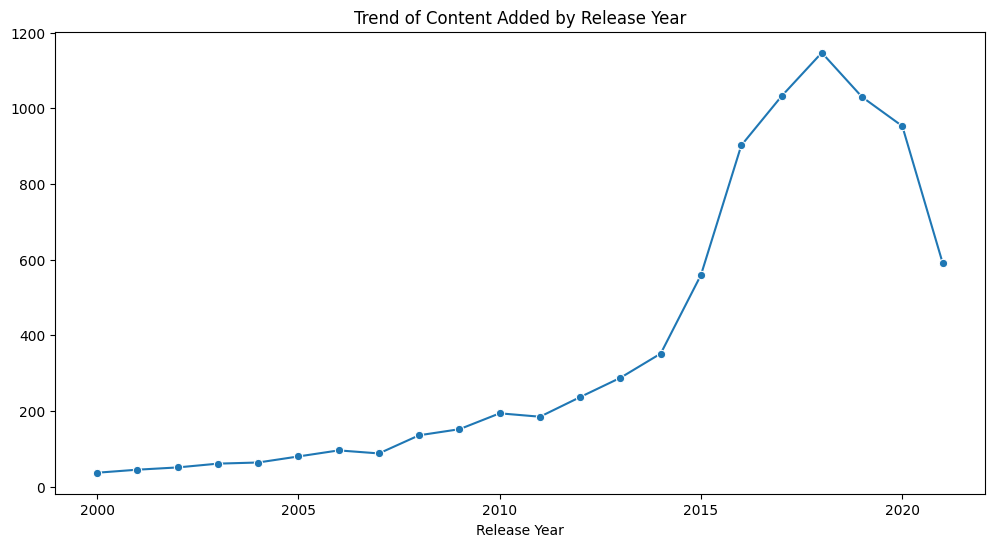

In [299]:
plt.figure(figsize=(12,6))
sns.lineplot(x=year['release_year'] , y= year['count'], marker='o')
plt.title('Trend of Content Added by Release Year')
plt.xlabel('Release Year')
plt.ylabel('')
plt.show()

### Identify top genres globally and per country.

In [302]:
from collections import Counter
import itertools

all_genres = df['listed_in'].apply(lambda x: [genre.strip() for genre in x.split(',')])
flat_genres = list(itertools.chain.from_iterable(all_genres))
genre_counts = Counter(flat_genres)
top_genres = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending = False)
top_genres.head(10).to_csv('top_genres.csv', index=False)
top_genres.head(10)

,Genre,Count
14,International Movies,2752
12,Dramas,2427
16,Comedies,1674
1,International TV Shows,1351
0,Documentaries,869
25,Action & Adventure,859
2,TV Dramas,763
13,Independent Movies,756
11,Children & Family Movies,641
19,Romantic Movies,616


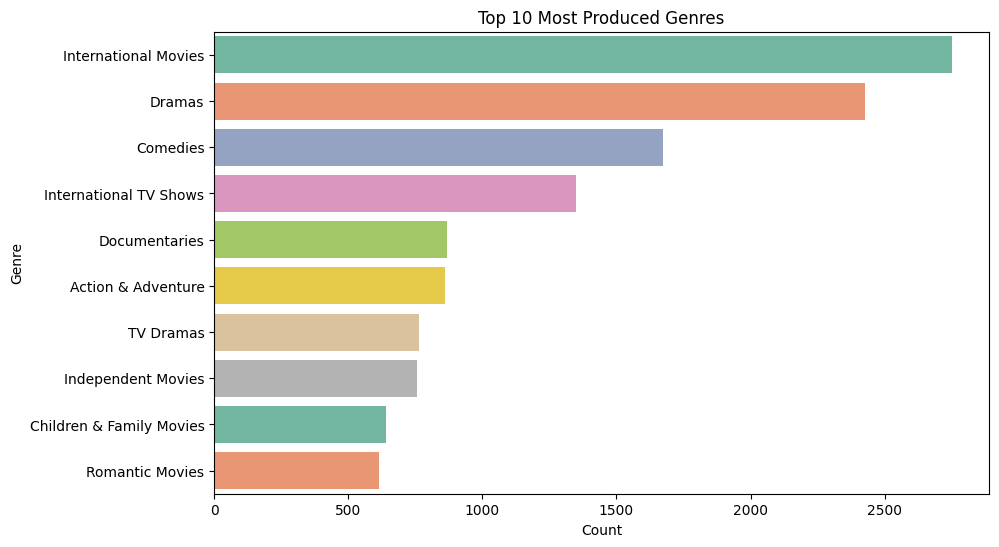

In [304]:
plt.figure(figsize=(10, 6))
sns.barplot(data = top_genres.head(10), x='Count', y='Genre', hue='Genre',palette = 'Set2')
plt.title('Top 10 Most Produced Genres')
plt.show()

#### top genres per country

In [307]:
df_genre_country = df[['country', 'listed_in']]
df_genre_country['country'] = df_genre_country['country'].apply(lambda x: [i.strip() for i in x.split(',')])
df_genre_country['genre'] = df_genre_country['listed_in'].apply(lambda x: [i.strip() for i in x.split(',')])

df_exploded = df_genre_country.explode('country').explode('genre')
df_exploded = df_exploded[df_exploded['country'] != 'Unknown'] 
df_exploded = df_exploded[df_exploded['country'] != '']
top_genres_per_country = df_exploded.groupby(['country', 'genre']).size().reset_index(name='count')
top_3_per_country = pd.DataFrame(top_genres_per_country.sort_values(['count'], ascending = [False]).groupby('country').head(3))
# top_3_per_country.head(10).to_csv('top_genres_per_country.csv', index=False)
print(top_3_per_country.head(10))

             country                 genre  count
519            India  International Movies    864
1338   United States                Dramas    835
1333   United States              Comedies    680
515            India                Dramas    662
1336   United States         Documentaries    512
510            India              Comedies    323
1290  United Kingdom      British TV Shows    225
384           France  International Movies    207
1299  United Kingdom                Dramas    197
1303  United Kingdom  International Movies    170


C:\Users\DELL\AppData\Local\Temp\ipykernel_21920\938769697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genre_country['country'] = df_genre_country['country'].apply(lambda x: [i.strip() for i in x.split(',')])
C:\Users\DELL\AppData\Local\Temp\ipykernel_21920\938769697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genre_country['genre'] = df_genre_country['listed_in'].apply(lambda x: [i.strip() for i in x.split(',')])


In [311]:
# Optional: limit to a few countries for clarity
countries_to_plot = top_3_per_country['country'].unique()[:6]  # e.g., first 6 countries

# Filter data
filtered = top_3_per_country[top_3_per_country['country'].isin(countries_to_plot)]
top_genres_per_country = pd.DataFrame(filtered)
top_genres_per_country.to_csv('top_genres_per_country.csv', index=False)

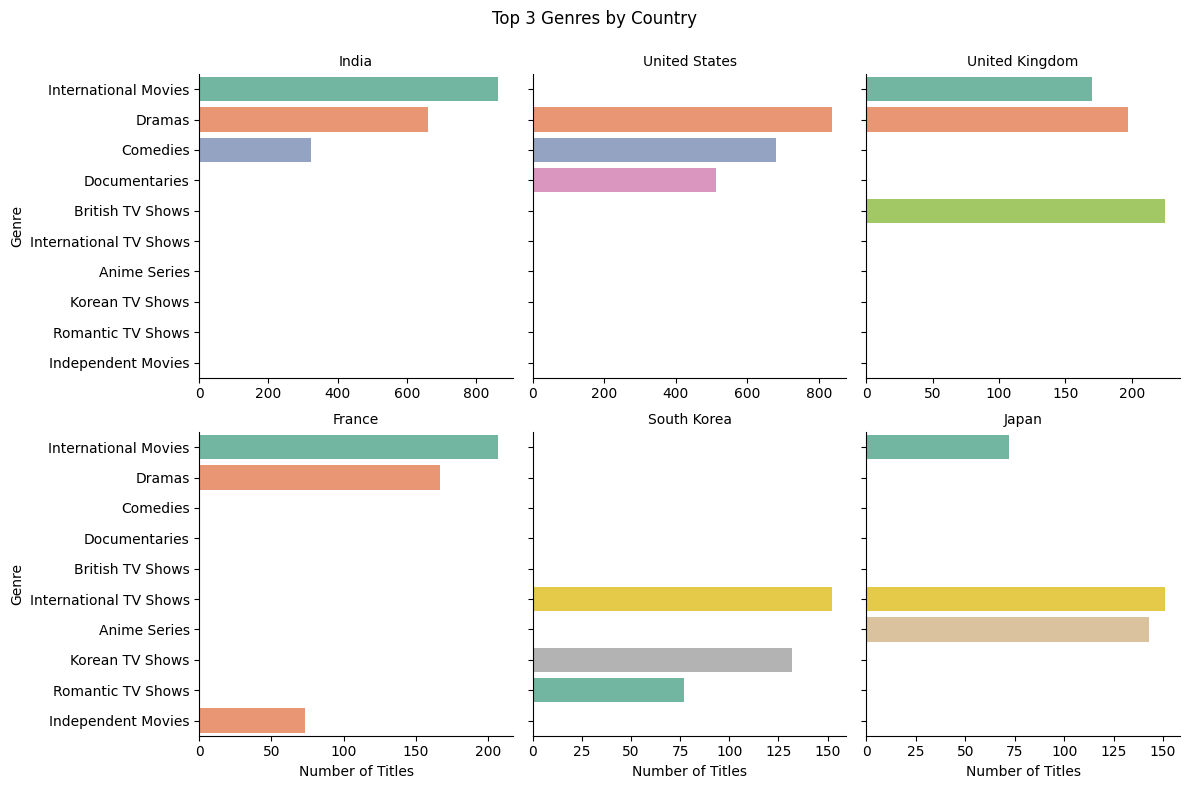

In [197]:


# Create facet plot
g = sns.catplot(
    data=filtered,
    kind='bar',
    x='count',
    y='genre',
    hue = 'genre',
    col='country',
    col_wrap=3,
    sharex=False,
    palette='Set2',
    height=4
)

g.set_titles("{col_name}")
g.set_axis_labels("Number of Titles", "Genre")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Top 3 Genres by Country')

plt.show()




### Explore actor/director popularity and collaboration networks.

In [200]:
# Top Actors by Number of Titles
all_casts = df['cast'].dropna().apply( lambda x: [i.strip() for i in x.split(',')])
flat_casts = list(itertools.chain.from_iterable(all_casts))
cast_counts = Counter(flat_casts)
top_actors = pd.DataFrame(cast_counts.items(), columns=['Actor', 'Count']).sort_values(by='Count', ascending = False)
top_actors = top_actors[top_actors['Actor'] != 'Unknown']
top_actors.head(10).to_csv('top_actors.csv', index=False)
top_actors.head(10)

,Actor,Count
1434,Anupam Kher,43
783,Shah Rukh Khan,35
304,Julie Tejwani,33
1635,Naseeruddin Shah,32
4943,Takahiro Sakurai,32
305,Rupa Bhimani,31
1559,Akshay Kumar,30
11644,Om Puri,30
4469,Yuki Kaji,29
1621,Amitabh Bachchan,28


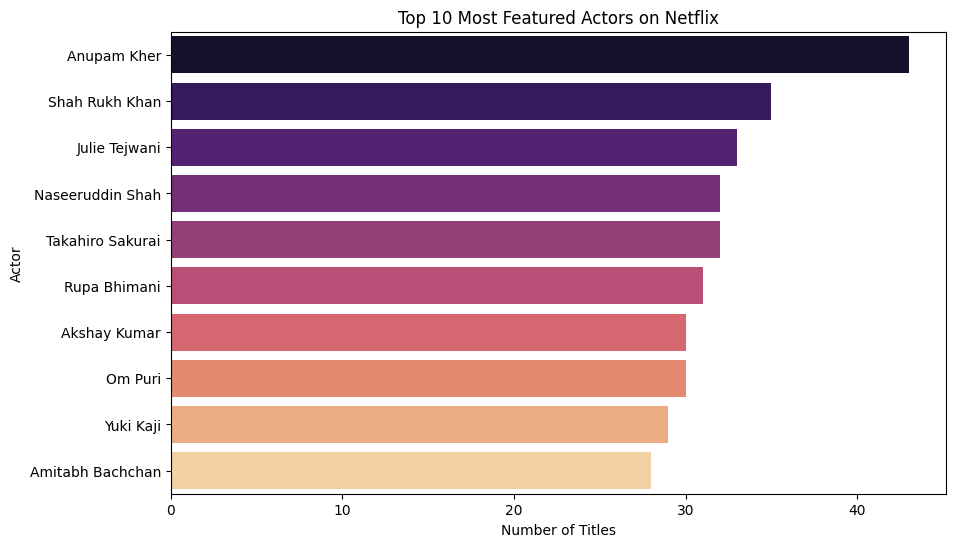

In [202]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_actors.head(10), x='Count', y='Actor', hue='Actor',palette='magma')
plt.title('Top 10 Most Featured Actors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Actor')
plt.show()

In [204]:
# Top Directors by Number of Titles
all_directors = df['director'].dropna().apply(lambda x: [i.strip() for i in x.split(',')])
flat_directors = list(itertools.chain.from_iterable(all_directors))
director_count = Counter(flat_directors)
top_directors = pd.DataFrame(director_count.items(), columns=['Director', 'Count']).sort_values(by='Count', ascending= False)
top_directors = top_directors[top_directors['Director'] != 'Unknown']
top_directors.head(10).to_csv('top_directors.csv', index=False)
top_directors.head(10)

,Director,Count
282,Rajiv Chilaka,22
2692,Jan Suter,21
2691,Raúl Campos,19
618,Suhas Kadav,16
1588,Marcus Raboy,16
1685,Jay Karas,15
986,Cathy Garcia-Molina,13
894,Martin Scorsese,12
2177,Jay Chapman,12
358,Youssef Chahine,12


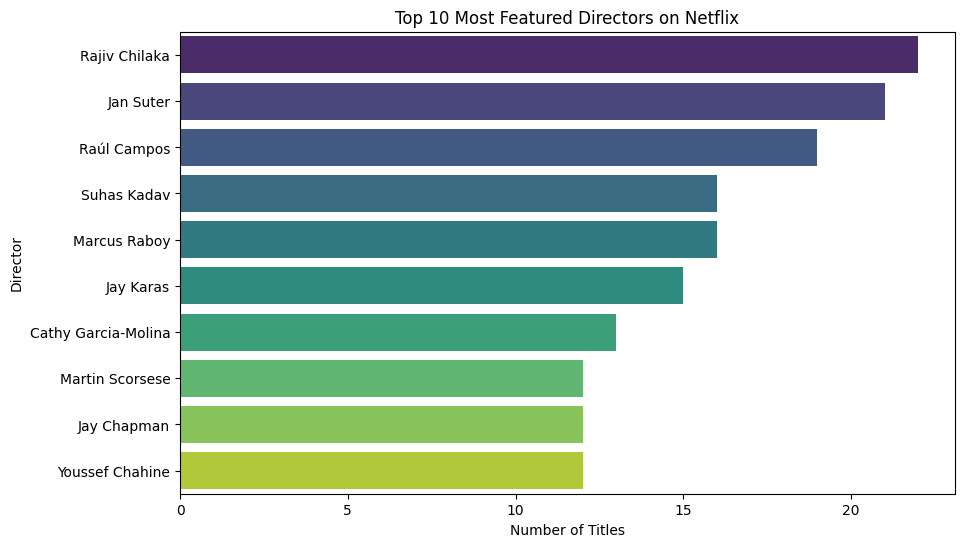

In [206]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_directors.head(10), x='Count', y='Director', hue='Director',palette='viridis')
plt.title('Top 10 Most Featured Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

In [208]:
# Actor-Director Collabration Network
df_collab = df[['director', 'cast']]
collabrations = []
for _,row in df_collab.iterrows():
    directors = [d.strip() for d in row['director'].split(',')]
    actors = [a.strip() for a in row['cast'].split(',')]
    for director in directors:
        for actor in actors:
            collabrations.append((director, actor))

collab_df = pd.DataFrame(collabrations, columns = ['Director', 'Actor'])
collab_df = collab_df[collab_df['Director'] != 'Unknown']
collab_df = collab_df[collab_df['Actor'] != 'Unknown']
collab_df

,Director,Actor
20,Julien Leclercq,Sami Bouajila
21,Julien Leclercq,Tracy Gotoas
22,Julien Leclercq,Samuel Jouy
23,Julien Leclercq,Nabiha Akkari
24,Julien Leclercq,Sofia Lesaffre
...,...,...
70807,Mozez Singh,Manish Chaudhary
70808,Mozez Singh,Meghna Malik
70809,Mozez Singh,Malkeet Rauni
70810,Mozez Singh,Anita Shabdish


In [210]:
top_collabs = collab_df.value_counts().reset_index(name='count').sort_values(by='count', ascending = False)
top_collabs.head(10).to_csv('top_collabs.csv', index=False)
top_collabs.head(10)

,Director,Actor,count
0,Rajiv Chilaka,Rajesh Kava,19
1,Rajiv Chilaka,Julie Tejwani,19
2,Rajiv Chilaka,Rupa Bhimani,18
3,Rajiv Chilaka,Jigna Bhardwaj,18
4,Rajiv Chilaka,Vatsal Dubey,16
5,Rajiv Chilaka,Mousam,13
6,Rajiv Chilaka,Swapnil,13
7,Suhas Kadav,Saurav Chakraborty,8
15,Toshiya Shinohara,Kappei Yamaguchi,7
20,S.S. Rajamouli,Ramya Krishnan,7


### Identify patterns in content rating (e.g., PG-13, R, etc.) across regions.

In [213]:
rating_df = df[['rating']].groupby(['rating']).value_counts().reset_index()
rating_df.to_csv('rating_df.csv', index=False)
rating_df

,rating,count
0,Adults,4009
1,Kids,975
2,Teens,3733
3,Unrated,90


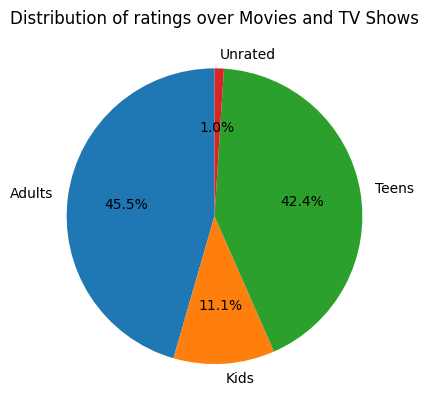

In [215]:
data = rating_df['count'].tolist()
labels = rating_df['rating'].tolist()
explode = (0.1, 0.1, 0.1, 0.1)
plt.pie(data, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title('Distribution of ratings over Movies and TV Shows')
plt.show()

In [217]:
df_country = pd.DataFrame(df[['country']].value_counts().head(10)).reset_index()
df_country = df_country[df_country['country'] != 'Unknown']
top_countries = df_country['country'].tolist()
df_country.to_csv('top_countries_released_content.csv', index=False)
df_country

,country,count
0,United States,2818
1,India,972
3,United Kingdom,419
4,Japan,245
5,South Korea,199
6,Canada,181
7,Spain,145
8,France,124
9,Mexico,110


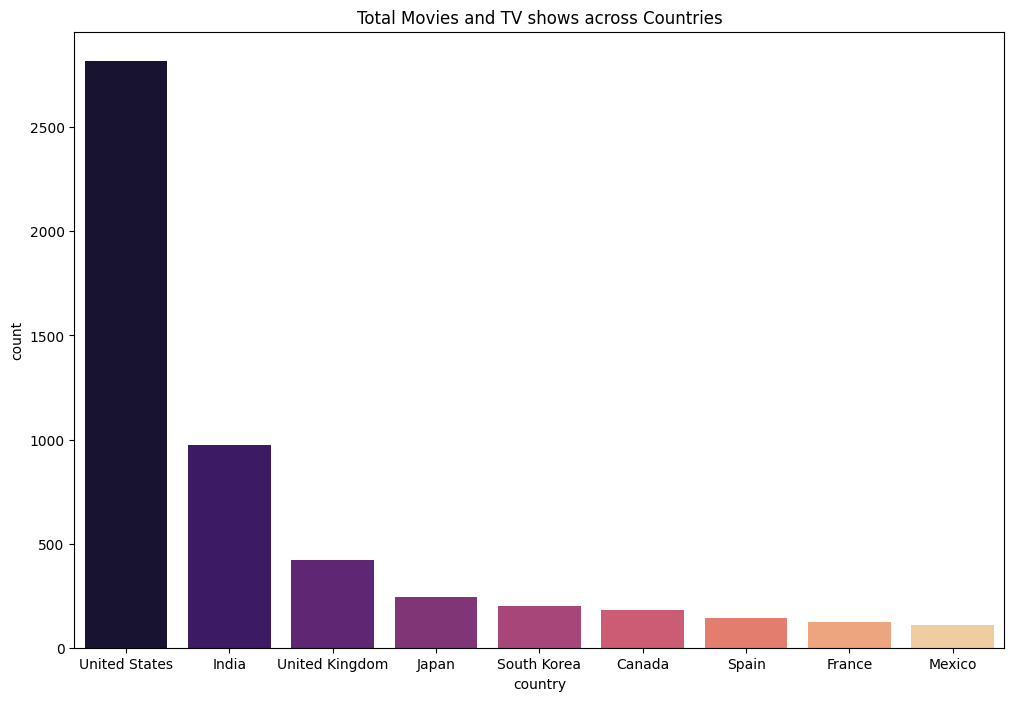

In [219]:
plt.figure(figsize=(12,8))
sns.barplot(x=df_country['country'], y=df_country['count'], hue=df_country['country'],palette='magma')
plt.title('Total Movies and TV shows across Countries')
plt.show()

In [221]:
df_ratings = df[['country', 'rating']]
df_ratings_top10 = df_ratings[df_ratings['country'].isin(top_countries)]
top10_rating_counts = df_ratings_top10.groupby(['country', 'rating']).size().reset_index(name='count')
top10_rating_counts.to_csv('top10_country_producing_content_ratings.csv', index=False)

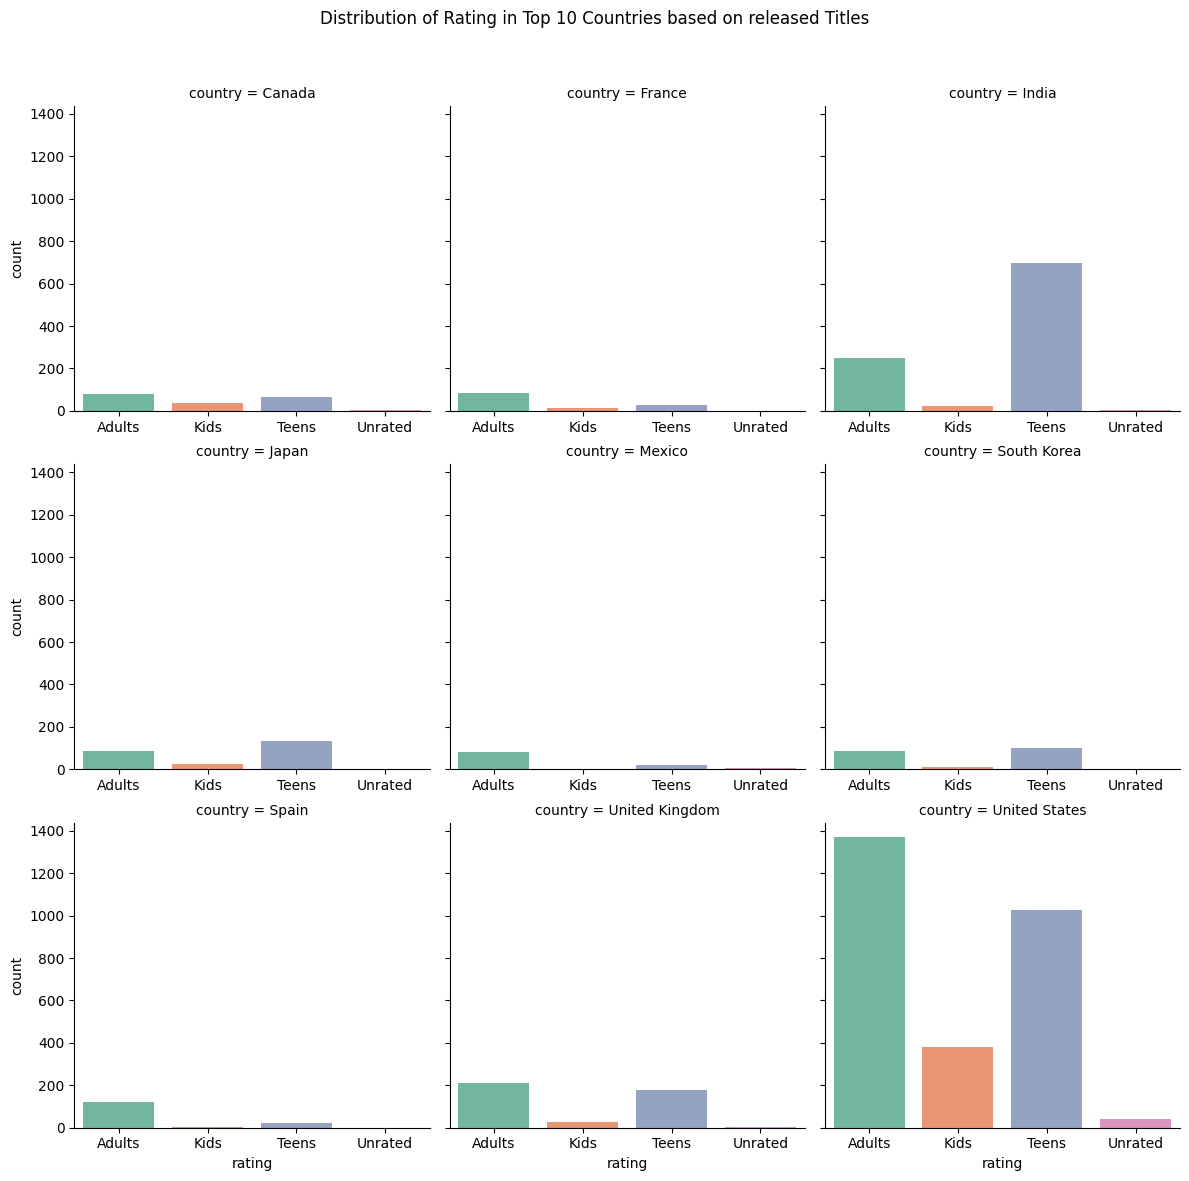

In [223]:
g = sns.catplot(
    data=top10_rating_counts,
    kind='bar',
    x='rating',
    y='count',
    hue = 'rating',
    col='country',
    col_wrap=3,
    sharex=False,
    palette='Set2',
    height=4
)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Rating in Top 10 Countries based on released Titles')

plt.show()